In [1]:
from PIL import Image
from statistics import *
import pandas as pd
import numpy as np
import datetime as datetime1
from datetime import datetime as datetime2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import math

In [2]:
# Q1
weather_data = pd.read_csv("weather_data.csv")

In [3]:
# Unix Time
#weather_data

In [4]:
energy_data = pd.read_csv("energy_data.csv")

In [5]:
#energy_data

Here we take the sum of energy usage to get total usage per day but running a loop and starting count and stopping based on time.

In [6]:
energy_usage = {}
lastDate = 0
for i in range (0, len(energy_data["Date & Time"])):
    temp = datetime1.datetime.strptime(energy_data["Date & Time"].get(i),"%Y-%m-%d %H:%M:%S")
    new_format = "%Y-%m-%d"
    date = temp.strftime(new_format)
    temp = datetime1.datetime.strptime(energy_data["Date & Time"].get(i),"%Y-%m-%d %H:%M:%S")
    new_format = "%H:%M:%S"
    time = temp.strftime(new_format)
    if (date != lastDate):
        lastDate = date
        totalEnergyUsed = energy_data["use [kW]"].get(i)
    totalEnergyUsed += energy_data["use [kW]"].get(i)
    if (time == "23:30:00"):
        energy_usage[date] = totalEnergyUsed

#energy_usage 

As we have to create a new csv file combining energy used and the weather_data, here I take all column headers of weather_data and removed the others that cannot be summarized into a days' value.

In [7]:
weather_column = []
for row in weather_data:
    weather_column.append(row)
    
weather_column.pop(1)
weather_column.pop(3)
weather_column.pop(6)
allData = {}
weatherData = {}
#weather_column

Next, we merge the summarize the data from weather_data by getting the mean. We also distinguish between days here by the time.

In [8]:
# "and merge it with weather data"
for i in range (0, len(weather_data["time"])):
    dt = datetime2.utcfromtimestamp(weather_data["time"].get(i)).strftime('%Y-%m-%d %H:%M:%S')
    temp = datetime1.datetime.strptime(dt,"%Y-%m-%d %H:%M:%S")
    new_format = "%Y-%m-%d"
    date = temp.strftime(new_format)
    temp = datetime1.datetime.strptime(energy_data["Date & Time"].get(i),"%Y-%m-%d %H:%M:%S")
    new_format = "%H:%M:%S"
    time = temp.strftime(new_format)
    if(time == "00:00:00" or time == "12:00:00"):
        allData[date] = []
        
for c in weather_column:
    for i in range (0, len(weather_data["time"])):
        dt = datetime2.utcfromtimestamp(weather_data["time"].get(i)).strftime('%Y-%m-%d %H:%M:%S')
        temp = datetime1.datetime.strptime(dt,"%Y-%m-%d %H:%M:%S")
        new_format = "%Y-%m-%d"
        date = temp.strftime(new_format)
        temp = datetime1.datetime.strptime(energy_data["Date & Time"].get(i),"%Y-%m-%d %H:%M:%S")
        new_format = "%H:%M:%S"
        time = temp.strftime(new_format)

        if(time == "00:00:00" or time =="12:00:00"): # Indication of new day
            weatherData[c] = []

        if(weather_data[c].get(i)):
            if(math.isnan(weather_data[c].get(i))):
                weatherData[c].append(0)
            else:
                weatherData[c].append(weather_data[c].get(i))


        if(time == "23:30:00" or time == "11:30:00"): # Indication of end of day
            if(weatherData[c] == []):
                weatherData[c] = [0]
            weatherData[c] = mean(weatherData[c])
            allData[date].append(weatherData[c])

#allData


In [9]:
dateList = ["date"]
weather_column.append("use [kW]")
weather_column = dateList + weather_column

What is missing from the data that is yet to be prepared to be added is the date. So here we get a list of all dates in the database, which is the entire year of 2014.

In [10]:
allDates = list(allData.keys())
#allDates

With all pieces and segments of data done with preparation, we combine the data and input it into a new csv file called newData.

In [11]:
with open('newData.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(weather_column)
    
    for ad in range (0, len(allData)):
        starter = [allDates[ad]]
        end = [energy_usage.get(allDates[ad])]
        middle = allData.get(allDates[ad])
        row = starter + middle + end
        # write the data
        writer.writerow(row)
    f.close()

This is the beginning of the second question. The question has numerous parts, one of which is to get all the data from December. This is done here and put into another new csv file called decemberData.

In [12]:
# Q2
with open('decemberData.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(weather_column)
    
    with open('newData.csv') as f:
        readerNewData = csv.reader(f)
    
        for i in readerNewData:
            if("2014-12" in i[0]):
                writer.writerow(i)
        f.close()

In [13]:
newData = pd.read_csv("newData.csv")
#newData

In [14]:
decemberData = pd.read_csv("decemberData.csv")
#decemberData

As asked, we split the data into a training and a test set.

In [15]:
# train contains the training set, test contains the test set
train, test = train_test_split(decemberData)

Question 3 asks to do the following:
-Create a simple linear regression
-Predict energy usage by day
-Drop "use [kW] from the test set
-Calculate the RMSE

We delete the use [kW] column of the test set here by using the del function.

In [16]:
# Q3
testUseKW = test["use [kW]"]
testDate  = test["date"]
#testUseKW

In [17]:
del test["use [kW]"]
#test

In [18]:
#train.corr()

In order to make a linear regression and baseline model, we must choose a feature to compare with it. Usually features with high correlations with energy used ideal but not too high. In the chart below, we see that humidity has a good but negative correlation between energy used since the interception between features has a correlation of around 0.3. In hindsight, choosing cloudCover would be been better.

<AxesSubplot:>

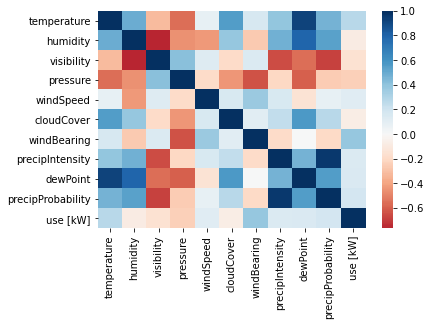

In [19]:
sns.heatmap(train.corr(), cmap='RdBu', center=0)

The linear regression model is created here, resulting in a 5.05 RMSE which could be better since the RMSE can be closer to zero. This can also be visualized through the graph and how the points are far away from the prediction line.

The linear model is: used[kW] = -4.954573342840395 * Humidity + 33.929560508782046
MSE: 0.3013328509489611
RMSE: 0.5489379299601742


C:\Users\jeffl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jeffl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jeffl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


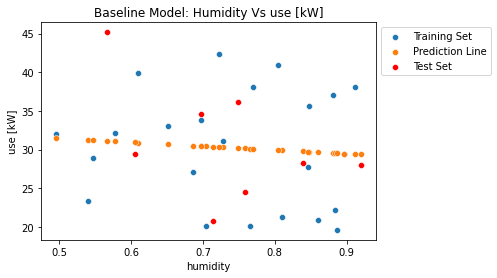

In [20]:
m = LinearRegression()

xTrain = train["humidity"].to_numpy().reshape(-1,1)
yTrain = train["use [kW]"].to_numpy().reshape(-1,1)
xTest = test["humidity"].to_numpy().reshape(-1,1)
yTest = testUseKW.to_numpy().reshape(-1,1)

m = m.fit(xTrain,yTrain)
coef = m.coef_
intercept = m.intercept_
print("The linear model is: used[kW] = " + str(coef[0][0]) + " * Humidity + " + str(intercept[0]))

predictions = m.predict(xTest)
MSE = np.mean(yTest - predictions) ** 2
RMSE = np.sqrt(MSE)
print("MSE: " +str(MSE))
print("RMSE: " +str(RMSE))
predictions = m.predict(decemberData["humidity"].to_numpy().reshape(-1, 1))
predictions1d = []
for i in predictions:
    predictions1d.append(i[0])

            
sns.scatterplot(train["humidity"], train["use [kW]"],label="Training Set")
sns.scatterplot(decemberData["humidity"], predictions1d, label="Prediction Line")
sns.scatterplot(test["humidity"], testUseKW, color="red", label="Test Set")
plt.title("Baseline Model: Humidity Vs use [kW]")
plt.legend(bbox_to_anchor= (1,1))

For the final part of this question, we must enter our predictions into a new csv file named cse351_hw2_Zhang_Junhui_112895310_linear_regression. The data entered is the date and the predicted use of energy which is obtained by the linear regression equation.

In [21]:
with open('cse351_hw2_Zhang_Junhui_112895310_linear_regression.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(["Date", "Predicted Use [kW]"])
    for i in range(0, len(decemberData["date"])):
        input = []
        input.append(decemberData["date"].get(i))
        x = decemberData["humidity"].get(i)
        b = intercept[0]
        m = coef[0][0]
        inputPredict = m * x + b
        input.append(inputPredict)
        writer.writerow(input)
        

Ultimately, this model did not work very well mainly because the features present a poor correlation of around 0.3. Additional reasons of failure may be cause no outliers has been removed, Napier's logarithm has not be applied and most importantly, a better feature could of been used, specially one that has a good correlation between energy used.

In question 4, the question requires how classify if temperatures are low or high, a logistic regression model , a F score and new data into another csv file.

In [22]:
# Q4
train, test = train_test_split(decemberData)

In [23]:
#train

Here after seperating the data into training and test sets, we classify the temperature if it is high or low, if it was 35 degrees and above or below. All info is put into 4 lists.

In [24]:
for i in decemberData["date"]:
    decemberData["date"] = decemberData["date"].replace(i, str(i).replace("-",""))
    
x = decemberData["date"]
y = decemberData["temperature"].round(0)

over35X = []
under35X = []
over35Y = []
under35Y = []
for i in range (0,len(x)):
    if (int(y.get(i)) >= 35):
        over35X.append(x.get(i))
        over35Y.append(y.get(i))
    else:
        under35X.append(x.get(i))
        under35Y.append(y.get(i))


Using the data that we have just pre-processed, we can plot our scatter plot and our logistic regression function. 

<ipython-input-25-c4c94fd2ba30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["date"] = train["date"].replace(i, str(i).replace("-",""))
<ipython-input-25-c4c94fd2ba30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["date"] = test["date"].replace(i, str(i).replace("-",""))
C:\Users\jeffl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

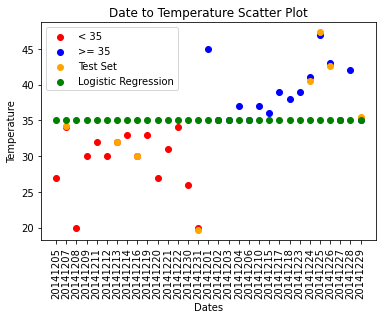

In [25]:
for i in train["date"]:
    train["date"] = train["date"].replace(i, str(i).replace("-",""))
    
for i in test["date"]:
    test["date"] = test["date"].replace(i, str(i).replace("-",""))
    
xTrain = train["date"].to_numpy().reshape(-1,1)
yTrain = train["temperature"].round(0).to_numpy().reshape(-1,1)
xTest = test["date"].to_numpy().reshape(-1,1)
yTest = test["temperature"].round(0).to_numpy().reshape(-1,1)
m2 = LogisticRegression()
m2 = m2.fit(xTrain,yTrain)
x2 = x.to_numpy().reshape(-1,1)
y_pred = m2.predict(x2)

plt.scatter(under35X,under35Y,color="red",label="< 35")
plt.scatter(over35X,over35Y,color="blue",label=">= 35")
plt.scatter(test["date"],test["temperature"],color="orange",label="Test Set")
plt.scatter(x,y_pred,color="green",label="Logistic Regression")
plt.title("Date to Temperature Scatter Plot")
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.legend(loc="upper left")
plt.show()

coef = m2.coef_
intercept = m2.intercept_

The F-Score we concluded to be is around 0.0098 which is not good because a F-Score of near 1 is optimal and 0 is the worst value.

In [26]:
fscore = str(f1_score(y, y_pred, average="macro"))
print("F-Score: "+fscore)

F-Score: 0.015432098765432096


Once again, we create another csv file to input the information if the temperature was 35 and above or below by date.

In [27]:
decemberDates = []
for i in allDates:
    if("2014-12-" in i):
        decemberDates.append(i)
        
with open('cse351_hw2_Zhang_Junhui_112895310_logistic_regression.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(["Date", "Classification Of Temp"])
    for i in range(0, len(decemberData["date"])):
        input = []
        input.append(decemberDates[i])
        if(decemberData["temperature"].get(i) >= 35):
            input.append(1)
        else:
            input.append(0)

        writer.writerow(input)
        

For question #5, I decided to choose the two devices of furnace and washer and to answer the questions "Is the [enter device here] being used only during the day? and the question during what time of the day is [enter device here] most used.

In [28]:
# Q5
#energy_data

To answer these questions, I seperated the data by day and night and by date. Next, I find the total energy used for day and night.

In [29]:
furnaceDayNightData = {}
washerDayNightData = {}
furnaceEnergy = []
washerEnergy = []
for i in range (0, len(energy_data["Date & Time"])):
    temp = datetime1.datetime.strptime(energy_data["Date & Time"].get(i),"%Y-%m-%d %H:%M:%S")
    new_format = "%Y-%m-%d"
    date = temp.strftime(new_format)
    temp = datetime1.datetime.strptime(energy_data["Date & Time"].get(i),"%Y-%m-%d %H:%M:%S")
    new_format = "%H:%M:%S"
    time = temp.strftime(new_format)
    
    if("06:00:00" in time):
        if(furnaceEnergy or washerEnergy):
            if(len(furnaceEnergy) != 0 or len(washerEnergy) != 0):
                temp = date + " day"
                furnaceDayNightData[temp] = furnaceEnergy
                washerDayNightData[temp] = washerEnergy
            furnaceEnergy = []
            washerEnergy = []
               
    if("19:00:00" in time):
        if(len(furnaceEnergy) != 0 or len(washerEnergy) != 0):
            temp = date + " night"
            furnaceDayNightData[temp] = furnaceEnergy
            washerDayNightData[temp] = washerEnergy
        furnaceEnergy = []
        washerEnergy = []
        
    furnaceEnergy.append(energy_data["Furnace [kW]"].get(i))
    washerEnergy.append(energy_data["Washer [kW]"].get(i))
    
#furnaceDayNightData


In [30]:
washerDayEnergy = 0
washerNightEnergy = 0
furnaceDayEnergy = 0
furnaceNightEnergy = 0 

keys = list(furnaceDayNightData.keys())
for k in keys:
    washerL = washerDayNightData.get(k)
    sum = 0
    for i in washerL:
        sum += i
    if("day" in k):
        washerDayEnergy += sum
    else:
        washerNightEnergy += sum
        
    furnaceL = furnaceDayNightData.get(k)
    sum = 0
    for i in washerL:
        sum += i
    if("day" in k):
        furnaceDayEnergy += sum
    else:
        furnaceNightEnergy += sum
        
print("WasherDay: " +str(washerDayEnergy))
print("washerNight: "+str(washerNightEnergy))
print("furnanceDay: "+str(furnaceDayEnergy))
print("furnacneNight: "+str(furnaceNightEnergy))

WasherDay: 10.092497203000006
washerNight: 43.63436277900002
furnanceDay: 10.092497203000006
furnacneNight: 43.63436277900002


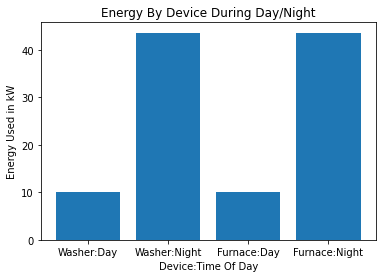

In [31]:
xAxis = ("Washer:Day","Washer:Night","Furnace:Day","Furnace:Night")
yAxis = [washerDayEnergy,washerNightEnergy,furnaceDayEnergy,furnaceNightEnergy]
plt.bar(xAxis,yAxis, align="center")
plt.title("Energy By Device During Day/Night")
plt.ylabel("Energy Used in kW")
plt.xlabel("Device:Time Of Day")
plt.show()
#- Is the washer being used only during the day?
#During what time of the day is AC used most?

In conclusion, we can establish that both the washer and the furnace are not only used during the day but in matter of fact, both devices are used more during the night. Coincidentally, both devices seem to be used the same amount during the day and during the night throughout the year, making these sets of bars look completely identical.